<p style="font-size:30px; color:red; font-weight:bold">Imports</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from collections import deque 

from sklearn.metrics import mean_squared_error
from keras.models import load_model
from datetime import datetime
import plotly.graph_objects as go

<p style="font-size:30px; color:red; font-weight:bold">Read the full Data Monthle and Dayle</p>

In [2]:
xls = pd.read_excel("Volve production data.xlsx" , sheet_name=['Dayle', 'Monthle']) #Read the 2 sheet of the excel file
data = xls["Dayle"]  #save the page1 dayle production to the data variabel
data_month = xls["Monthle"].drop(0).reset_index().drop(columns=['index']) #save the page2 monthle produciotn to the data_month variabel
print("Dayle production:")# the relationship between oil production and water production for each well
plt.tight_layout()
plt.show
display(data.head(5))   #display of the 5 row of the dayle produciont
print("-----------------------------------------------------------")
print("Monthly production:")
display(data_month.head(5)) #display of the 5 row of the monthle production

Dayle production:


DATEPRD WELL_BORE_CODE  NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C                7405         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C                7405         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C                7405         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C                7405         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C                7405         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.00000   
1            0.0                    NaN  ...              %    0.00000   
2            0.0                    NaN  ...              %    0.00000   
3            0.0                    NaN  ...              %    0.00000   
4            0.0              310.37614  ...              %   33.09788   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0    0.00000        0.00000          0.0           0.0           0.0   
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         WI  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]

-----------------------------------------------------------
Monthly production:


Wellbore name  NPDCode    Year  Month  On Stream       Oil         Gas  \
0    15/9-F-1 C   7405.0  2014.0    4.0      227.5  11142.47  1597936.65   
1    15/9-F-1 C   7405.0  2014.0    5.0  733.83334  24901.95  3496229.65   
2    15/9-F-1 C   7405.0  2014.0    6.0  705.91666  19617.76  2886661.69   
3    15/9-F-1 C   7405.0  2014.0    7.0  742.41666  15085.68  2249365.75   
4    15/9-F-1 C   7405.0  2014.0    8.0  432.99166   6970.43   1048190.8   

     Water   GI   WI  
0        0  NaN  NaN  
1   783.48  NaN  NaN  
2  2068.48  NaN  NaN  
3  6243.98  NaN  NaN  
4  4529.75  NaN  NaN

<Figure size 640x480 with 0 Axes>

<p style="font-size:30px; color:red; font-weight:bold">Monthly analyes each well</p>
<p style="font-size:20px; color:red; font-weight:bold">Rename the conlumn and clear data set</p>

In [3]:
data_month['NPDCode'].replace(7405, "well1", inplace=True)
data_month['NPDCode'].replace(7078, "well2", inplace=True)
data_month['NPDCode'].replace(5599, "well3", inplace=True)
data_month['NPDCode'].replace(5351, "well4", inplace=True)
data_month['NPDCode'].replace(7289, "well5", inplace=True)
data_month['NPDCode'].replace(5693, "well6", inplace=True)
data_month["day"] = 1
# convert year and month to date
data_month['date'] = pd.to_datetime(data_month[['Year', 'Month', "day"]])
data_month = data_month.drop(columns=['Year', "Month", "day","GI", "Wellbore name"])
data_month = data_month.rename(columns={'NPDCode': 'WELL'})
data_month = data_month.reindex(columns=['date', 'WELL', "On Stream", "Oil", "Gas", "Water", "WI"])
data_month.head()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_11772\2204958499.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_month['NPDCode'].replace(7405, "well1", inplace=True)


date   WELL  On Stream       Oil         Gas    Water   WI
0 2014-04-01  well1      227.5  11142.47  1597936.65        0  NaN
1 2014-05-01  well1  733.83334  24901.95  3496229.65   783.48  NaN
2 2014-06-01  well1  705.91666  19617.76  2886661.69  2068.48  NaN
3 2014-07-01  well1  742.41666  15085.68  2249365.75  6243.98  NaN
4 2014-08-01  well1  432.99166   6970.43   1048190.8  4529.75  NaN

<p style="font-size:20px; color:red; font-weight:bold">seperate all the wells data</p>

In [4]:
Wells = ["well1", "well2", "well3", "well4", "well5", "well6", "well7"]

for num in range(7):
    globals()["Well{}".format(num+1)] = data_month[data_month["WELL"] == "well{}".format(num+1)]
    globals()["Well{}".format(num+1)]["On Stream"] = globals()["Well{}".format(num+1)]["On Stream"].astype(float)
    globals()["Well{}".format(num+1)]["Oil"] = globals()["Well{}".format(num+1)]["Oil"].astype(float)
    globals()["Well{}".format(num+1)]["Gas"] = globals()["Well{}".format(num+1)]["Gas"].astype(float)
    globals()["Well{}".format(num+1)]["Water"] = globals()["Well{}".format(num+1)]["Water"].astype(float)
    globals()["Well{}".format(num+1)]["WI"] = globals()["Well{}".format(num+1)]["WI"].astype(float)

C:\Users\mehrd\AppData\Local\Temp\ipykernel_11772\904336841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()["Well{}".format(num+1)]["On Stream"] = globals()["Well{}".format(num+1)]["On Stream"].astype(float)
C:\Users\mehrd\AppData\Local\Temp\ipykernel_11772\904336841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()["Well{}".format(num+1)]["Oil"] = globals()["Well{}".format(num+1)]["Oil"].astype(float)
C:\Users\mehrd\AppData\Local\Temp\ipykernel_11772\904336841.py:7: SettingWithCop

<p style="font-size:20px; color:red; font-weight:bold">function's that use for the plot's for each wells</p>

In [5]:
def plot_monthly(df, col1, col2, col3, colr , name_plot):
    layout = go.Layout(title='<b>Annual {} (Sm<sup>3</sup>)</b>'.format(name_plot),
                   xaxis_title='Year',
                   yaxis_title='{}'.format(name_plot),
                   height=580,
                   width=900,
                   font_size=14)

    fig = go.Figure(layout=layout)
    for X, Y, Z in zip(col1, col2, col2):
        fig.add_trace(go.Bar(x=[X], y=[Y],
                        marker=dict(color=colr, line=dict(color='white', width=1.2)),
                        opacity=.9,
                        hovertemplate='<br>'.join(['Year = %{x}', 'Oil = %{y}', "On Stream = {}".format(Z)])))
        
    fig.update_layout(hovermode='x unified')

    fig.add_traces(data=go.Scatter(x=col1, y=col2,
                               line=dict(dash='dash', color='red', width=3),
                               marker_size=10,
                               name='Profile'))
    return fig

 

<p style="font-size:20px; color:red; font-weight:bold">check and analysis well1</p>

In [6]:
print("statistical analysis:")
display(Well1.describe())
print("--------------------------------------------------------")
print("over see of the form of the data:")
display(Well1.info())

statistical analysis:


date   On Stream          Oil           Gas  \
count                   25   25.000000     25.00000  2.500000e+01   
mean   2015-04-01 12:28:48  399.341326   7108.37320  1.057637e+06   
min    2014-04-01 00:00:00   27.500000    120.29000  2.585708e+04   
25%    2014-10-01 00:00:00  241.666670   2981.44000  4.768302e+05   
50%    2015-04-01 00:00:00  384.466800   5879.22000  8.566814e+05   
75%    2015-10-01 00:00:00  484.483320   9468.06000  1.439454e+06   
max    2016-04-01 00:00:00  745.000000  24901.95000  3.496230e+06   
std                    NaN  203.974941   5806.62827  8.304187e+05   

              Water   WI  
count     25.000000  0.0  
mean    8292.095600  NaN  
min        0.000000  NaN  
25%     5334.030000  NaN  
50%     8317.590000  NaN  
75%    11682.310000  NaN  
max    15945.730000  NaN  
std     4765.443117  NaN

--------------------------------------------------------
over see of the form of the data:
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       25 non-null     datetime64[ns]
 1   WELL       25 non-null     object        
 2   On Stream  25 non-null     float64       
 3   Oil        25 non-null     float64       
 4   Gas        25 non-null     float64       
 5   Water      25 non-null     float64       
 6   WI         0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.6+ KB


None

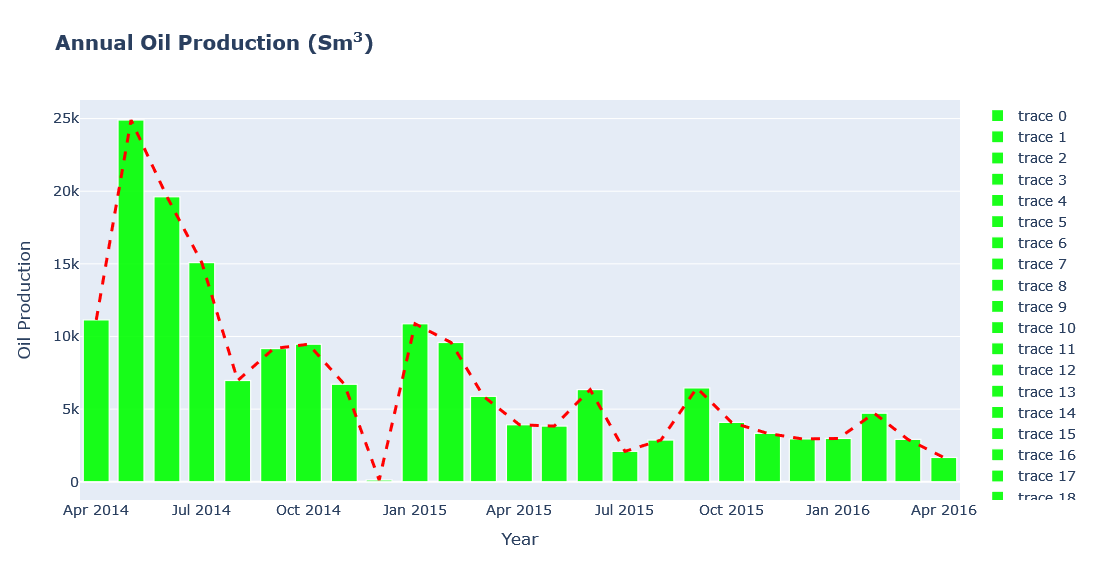

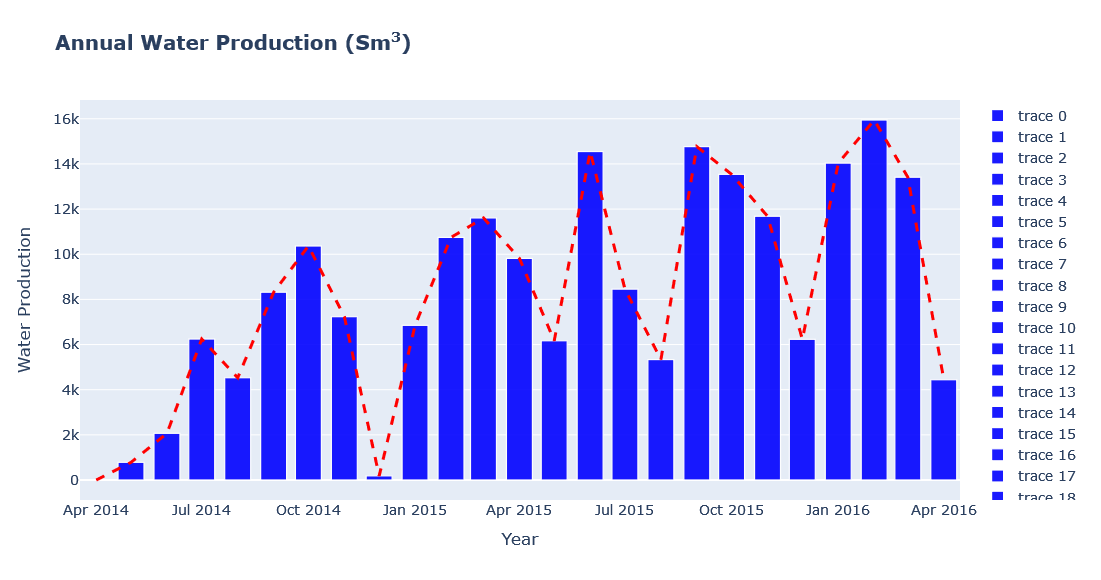

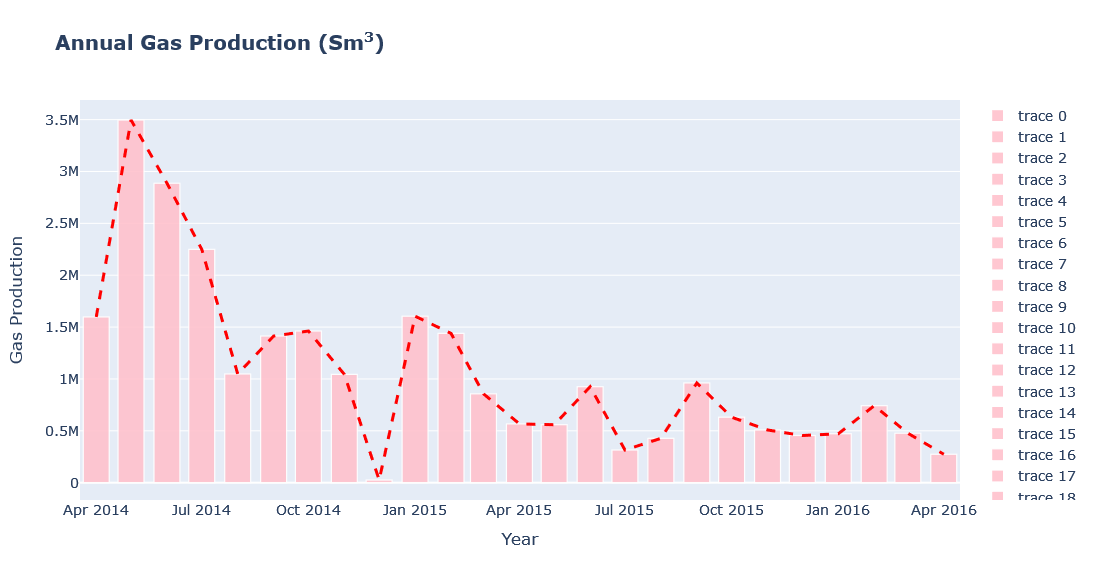

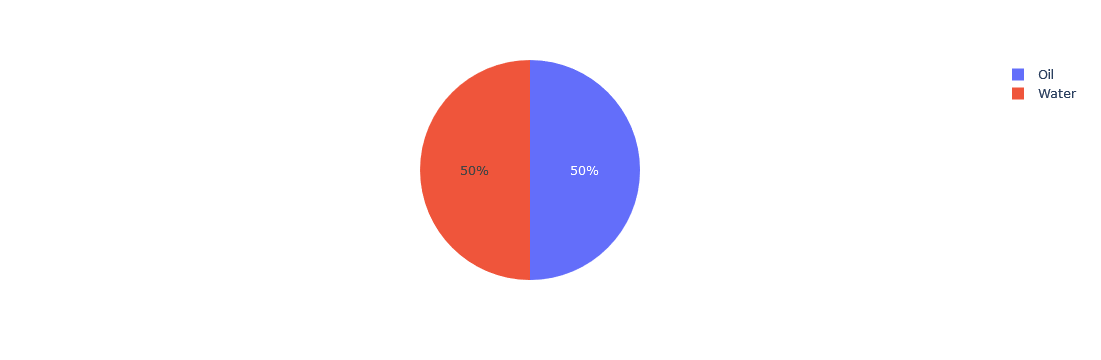

In [7]:
fig = plot_monthly(Well1,Well1.date, Well1.Oil, Well1["On Stream"], 'lime', "Oil Production")
fig.show()

fig = plot_monthly(Well1,Well1.date, Well1.Water, Well1["On Stream"], 'blue', "Water Production")
fig.show()

fig = plot_monthly(Well1,Well1.date, Well1.Gas, Well1["On Stream"], 'pink', "Gas Production")
fig.show()

fig = px.pie(Well1[["Oil", "Water"]], names=["Oil", "Water"]) 
fig.show()

<p style="font-size:20px; color:red; font-weight:bold">check and analysis well2</p>

In [8]:
print("statistical analysis:")
display(Well2.describe())
print("--------------------------------------------------------")
print("over see of the form of the data:")
display(Well2.info())

statistical analysis:


date   On Stream           Oil           Gas  \
count                             39   39.000000     39.000000  3.900000e+01   
mean   2015-01-30 19:04:36.923076864  666.826055  29432.028205  4.469501e+06   
min              2013-07-01 00:00:00  112.915140   3923.080000  5.905045e+05   
25%              2014-04-16 00:00:00  643.833330  25185.440000  3.854008e+06   
50%              2015-02-01 00:00:00  708.333330  31498.150000  4.769902e+06   
75%              2015-11-16 00:00:00  738.250500  34692.125000  5.254966e+06   
max              2016-09-01 00:00:00  745.000000  55029.220000  8.027510e+06   
std                              NaN  117.335408  11672.149560  1.674775e+06   

              Water   WI  
count     39.000000  0.0  
mean   27969.391538  NaN  
min        0.000000  NaN  
25%     4653.375000  NaN  
50%    14061.010000  NaN  
75%    51919.000000  NaN  
max    87762.190000  NaN  
std    27869.744267  NaN

--------------------------------------------------------
over see of the form of the data:
<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 25 to 63
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       39 non-null     datetime64[ns]
 1   WELL       39 non-null     object        
 2   On Stream  39 non-null     float64       
 3   Oil        39 non-null     float64       
 4   Gas        39 non-null     float64       
 5   Water      39 non-null     float64       
 6   WI         0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.4+ KB


None

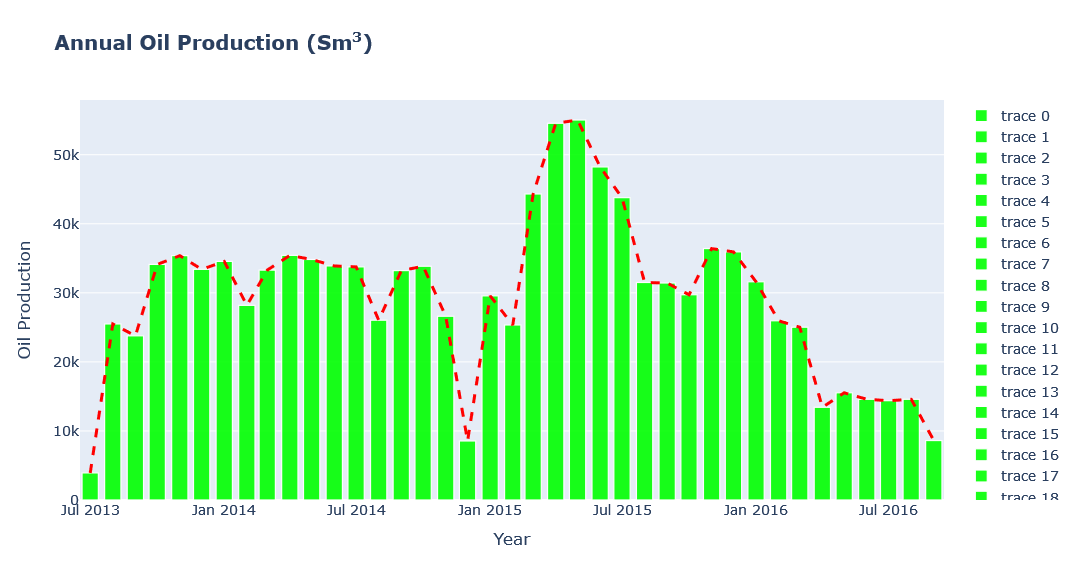

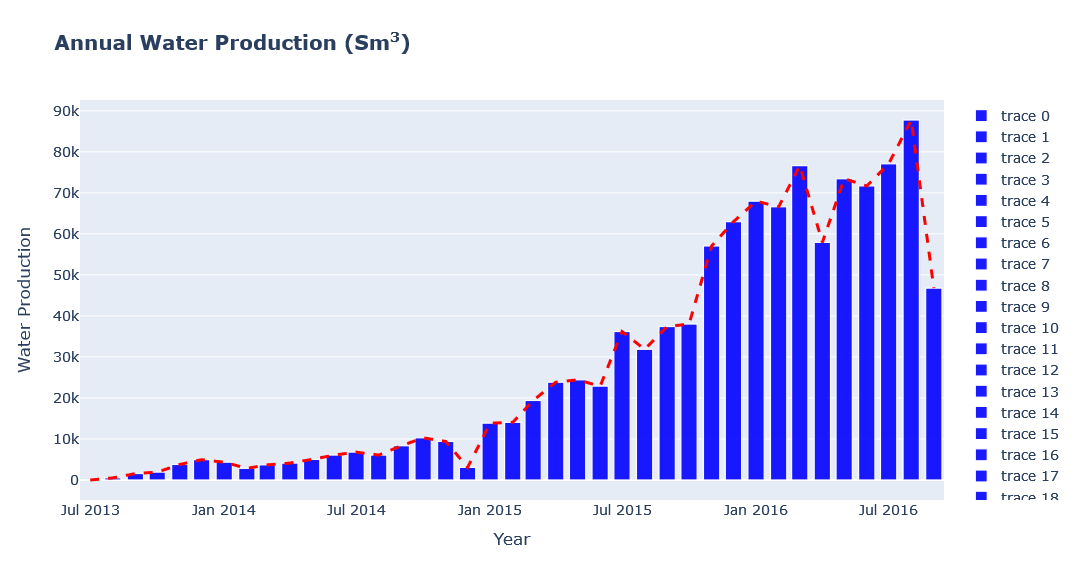

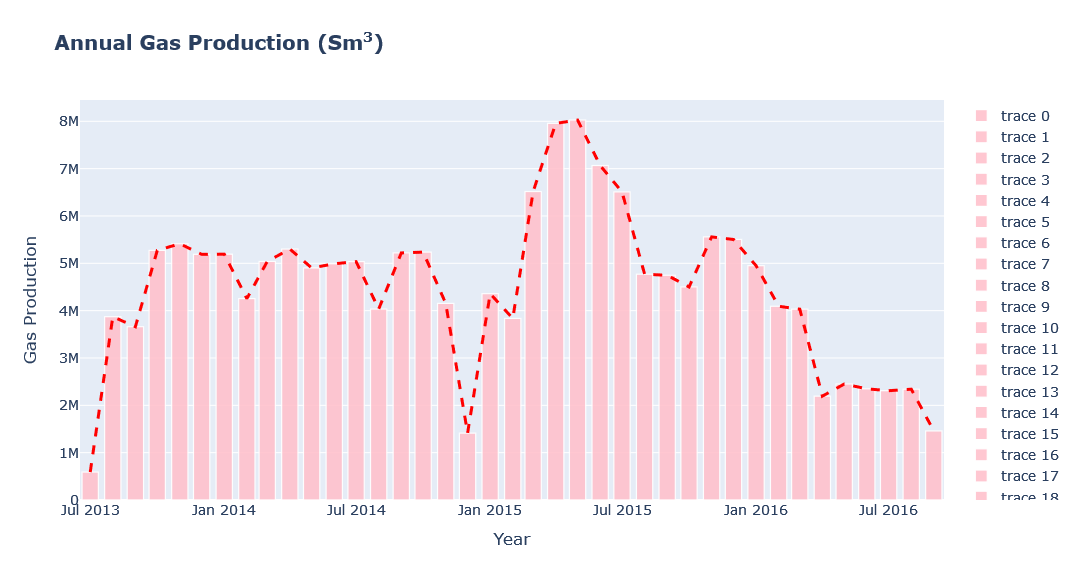

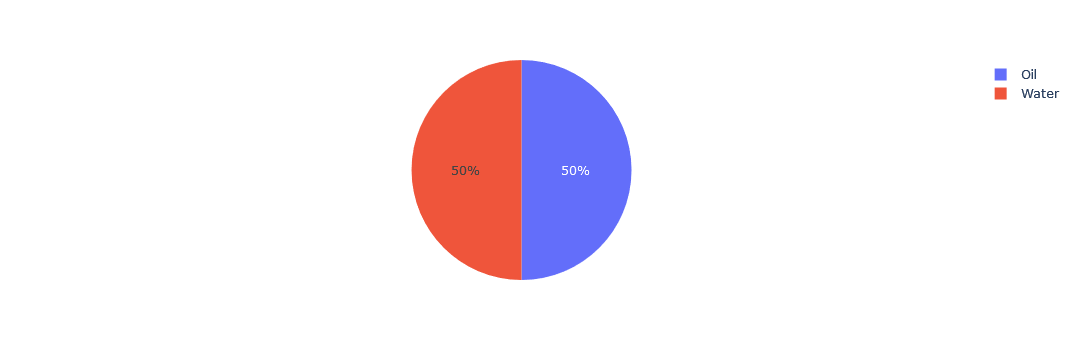

In [9]:
fig = plot_monthly(Well2,Well2.date, Well2.Oil, Well2["On Stream"], 'lime', "Oil Production")
fig.show()

fig = plot_monthly(Well2,Well2.date, Well2.Water, Well2["On Stream"], 'blue', "Water Production")
fig.show()

fig = plot_monthly(Well2,Well2.date, Well2.Gas, Well2["On Stream"], 'pink', "Gas Production")
fig.show()

fig = px.pie(Well2[["Oil", "Water"]], names=["Oil", "Water"]) 
fig.show()

<p style="font-size:20px; color:red; font-weight:bold">check and analysis well3</p>

In [10]:
print("statistical analysis:")
display(Well3.describe())
print("--------------------------------------------------------")
print("over see of the form of the data:")
display(Well3.info())

statistical analysis:


date   On Stream            Oil           Gas  \
count                            104  104.000000     104.000000  1.040000e+02   
mean   2012-05-16 15:41:32.307692288  626.962205   44034.707212  6.418676e+06   
min              2008-02-01 00:00:00    0.000000       0.000000  0.000000e+00   
25%              2010-03-24 06:00:00  589.757500    9167.207500  1.429153e+06   
50%              2012-05-16 12:00:00  694.092495   19704.705000  3.077013e+06   
75%              2014-07-08 18:00:00  728.833335   75177.727500  1.102427e+07   
max              2016-09-01 00:00:00  745.000000  166439.670000  2.410636e+07   
std                              NaN  160.113886   47552.868730  6.717709e+06   

               Water   WI  
count     104.000000  0.0  
mean    65705.003558  NaN  
min         0.000000  NaN  
25%     14233.680000  NaN  
50%     54787.135000  NaN  
75%    115044.620000  NaN  
max    155365.680000  NaN  
std     52912.212842  NaN

--------------------------------------------------------
over see of the form of the data:
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 64 to 167
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       104 non-null    datetime64[ns]
 1   WELL       104 non-null    object        
 2   On Stream  104 non-null    float64       
 3   Oil        104 non-null    float64       
 4   Gas        104 non-null    float64       
 5   Water      104 non-null    float64       
 6   WI         0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 6.5+ KB


None

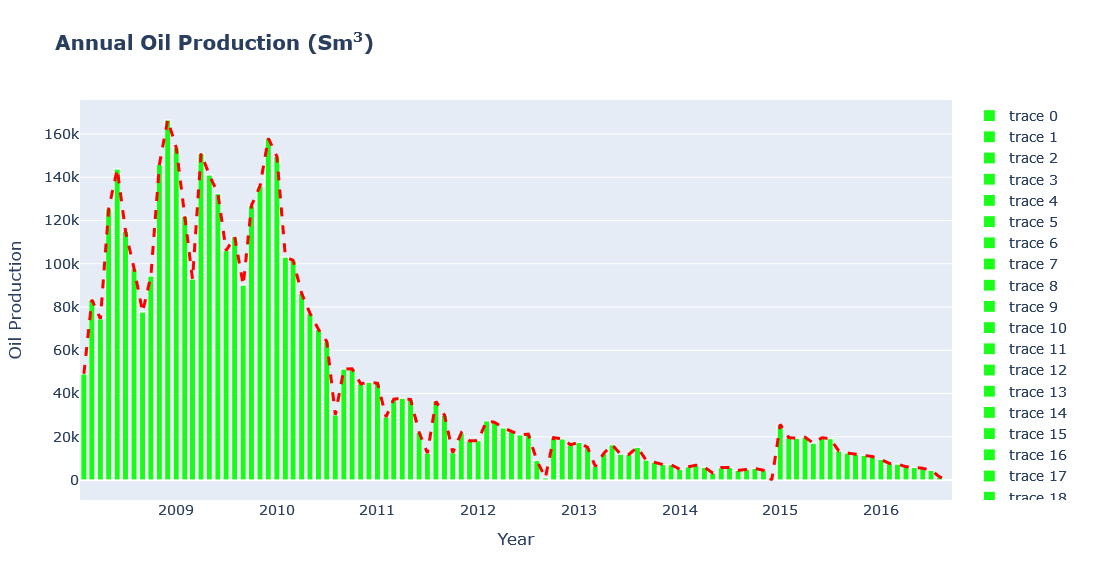

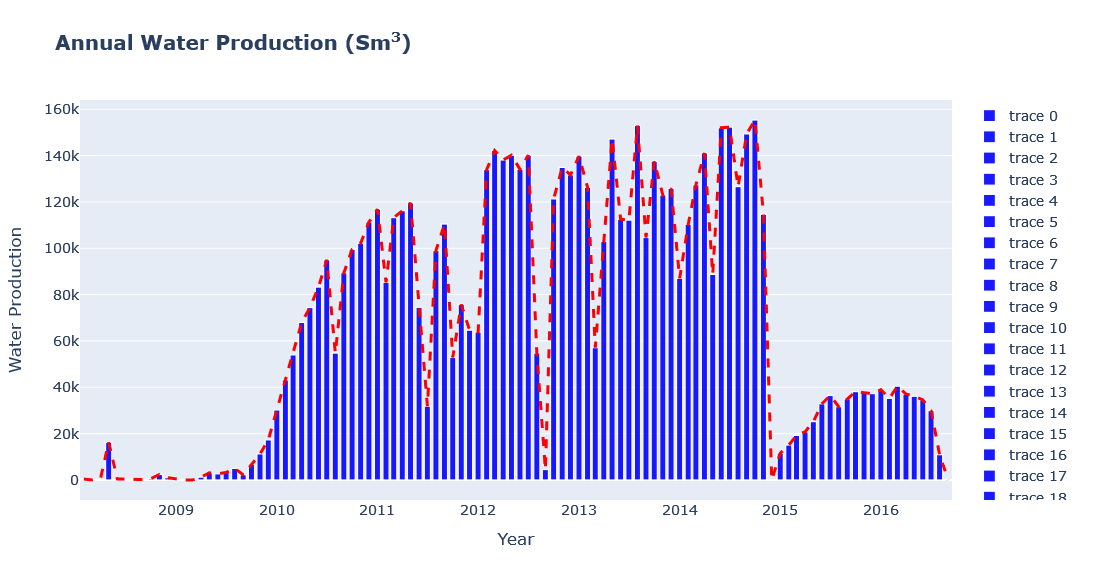

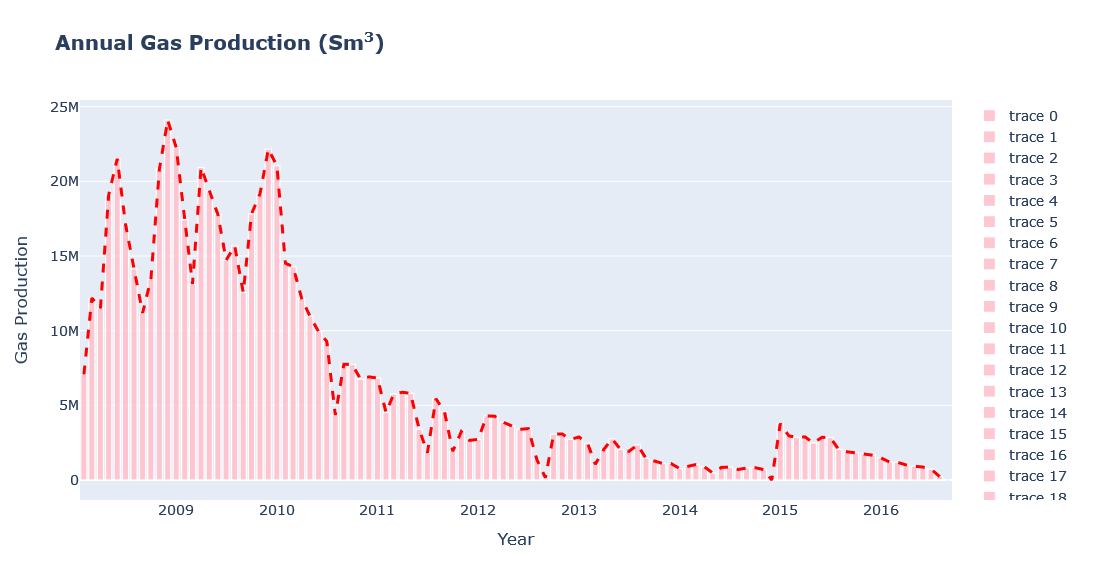

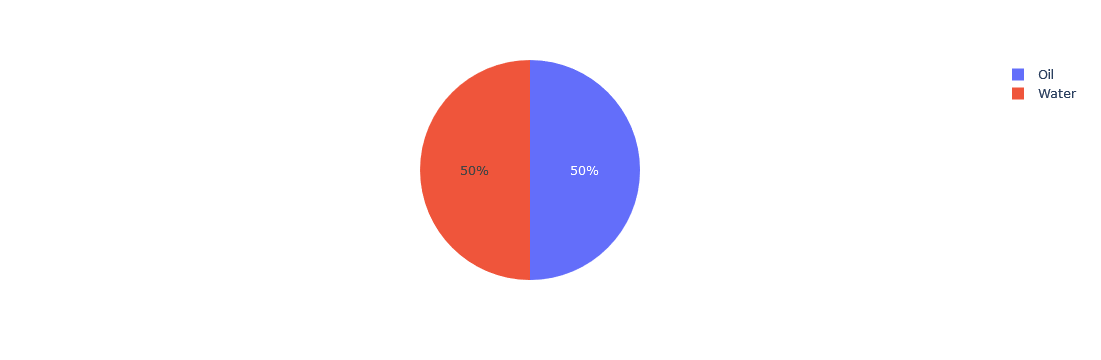

In [55]:
fig = plot_monthly(Well3,Well3.date, Well3.Oil, Well3["On Stream"], 'lime', "Oil Production")
fig.show()

fig = plot_monthly(Well3,Well3.date, Well3.Water, Well3["On Stream"], 'blue', "Water Production")
fig.show()

fig = plot_monthly(Well3,Well3.date, Well3.Gas, Well3["On Stream"], 'pink', "Gas Production")
fig.show()

fig = px.pie(Well3[["Oil", "Water"]], names=["Oil", "Water"]) 
fig.show()

<p style="font-size:20px; color:red; font-weight:bold">check and analysis well4</p>

In [56]:
print("statistical analysis:")
display(Well4.describe())
print("--------------------------------------------------------")
print("over see of the form of the data:")
display(Well4.info())

statistical analysis:


date   On Stream            Oil           Gas  \
count                            104  104.000000     104.000000  1.040000e+02   
mean   2012-05-16 15:41:32.307692288  603.593031   37906.090288  5.557784e+06   
min              2008-02-01 00:00:00    0.000000       0.000000  0.000000e+00   
25%              2010-03-24 06:00:00  590.493753    8350.057500  1.299206e+06   
50%              2012-05-16 12:00:00  692.283320   26952.380000  4.176245e+06   
75%              2014-07-08 18:00:00  732.750002   62208.605000  9.184196e+06   
max              2016-09-01 00:00:00  745.000000  142817.060000  2.032687e+07   
std                              NaN  206.468967   35586.373775  5.035633e+06   

               Water   WI  
count     104.000000  0.0  
mean    68473.555192  NaN  
min         0.000000  NaN  
25%     38735.467500  NaN  
50%     84240.435000  NaN  
75%     97985.837500  NaN  
max    133957.610000  NaN  
std     40048.527446  NaN

--------------------------------------------------------
over see of the form of the data:
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 168 to 271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       104 non-null    datetime64[ns]
 1   WELL       104 non-null    object        
 2   On Stream  104 non-null    float64       
 3   Oil        104 non-null    float64       
 4   Gas        104 non-null    float64       
 5   Water      104 non-null    float64       
 6   WI         0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 6.5+ KB


None

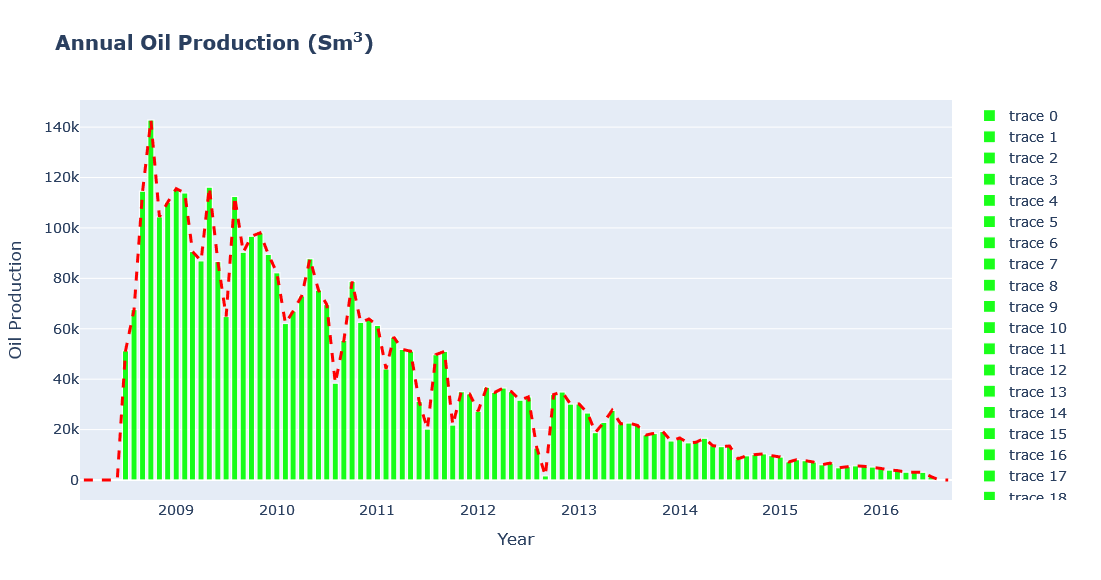

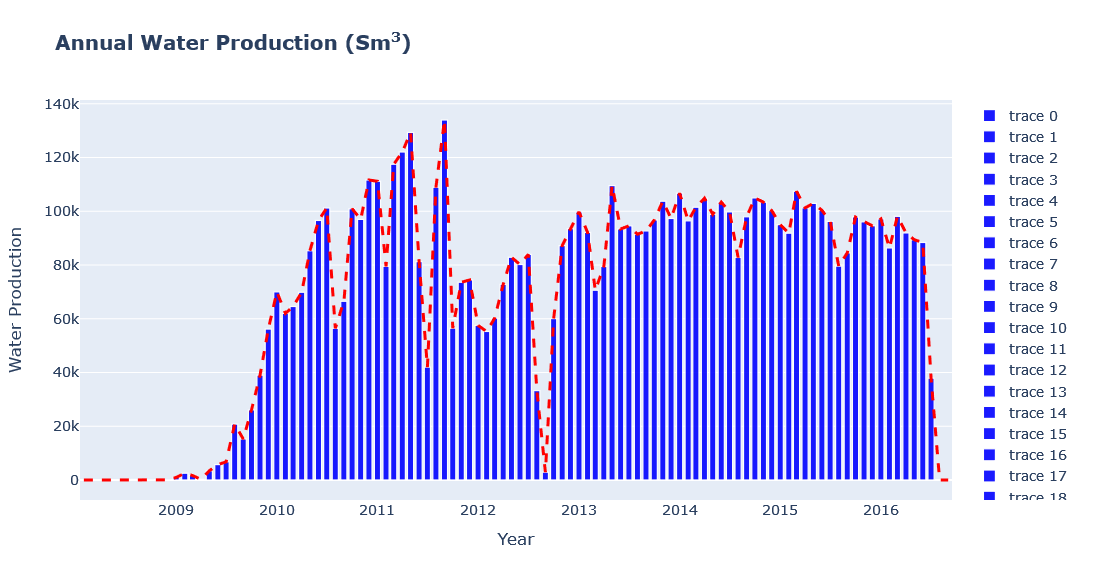

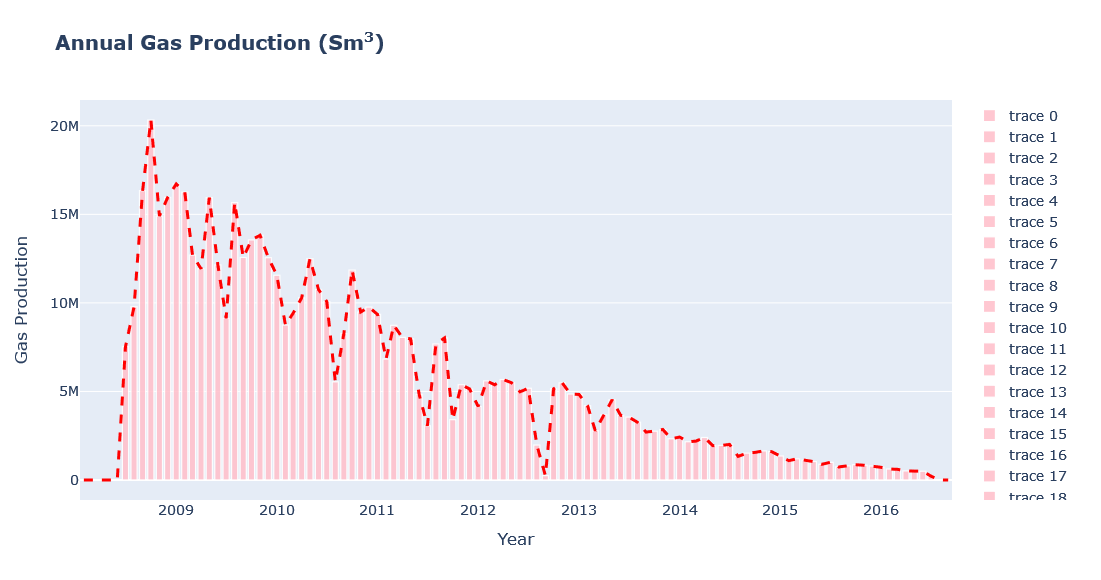

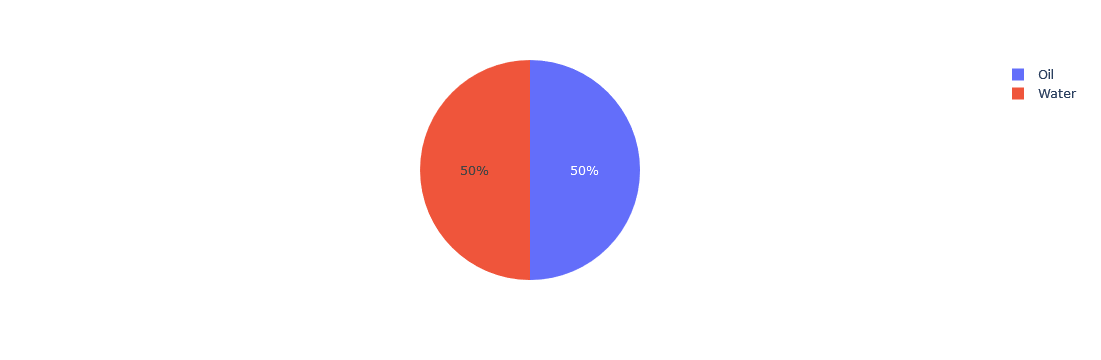

In [59]:
fig = plot_monthly(Well4,Well4.date, Well4.Oil, Well4["On Stream"], 'lime', "Oil Production")
fig.show()

fig = plot_monthly(Well4,Well4.date, Well4.Water, Well4["On Stream"], 'blue', "Water Production")
fig.show()

fig = plot_monthly(Well4,Well4.date, Well4.Gas, Well4["On Stream"], 'pink', "Gas Production")
fig.show()

fig = px.pie(Well4[["Oil", "Water"]], names=["Oil", "Water"]) 
fig.show()

In [60]:
print("statistical analysis:")
display(Well5.describe())
print("--------------------------------------------------------")
print("over see of the form of the data:")
display(Well5.info())

statistical analysis:


date   On Stream          Oil           Gas  \
count                             33   33.000000    33.000000  3.300000e+01   
mean   2015-05-02 01:27:16.363636480  540.146448  4500.562424  6.819803e+05   
min              2014-01-01 00:00:00    0.000000     0.000000  0.000000e+00   
25%              2014-09-01 00:00:00  433.325000  3577.670000  5.422859e+05   
50%              2015-05-01 00:00:00  647.458340  4581.290000  7.320521e+05   
75%              2016-01-01 00:00:00  709.333340  5975.510000  8.868792e+05   
max              2016-09-01 00:00:00  744.000000  7898.600000  1.196184e+06   
std                              NaN  230.555103  2162.983472  3.230405e+05   

             Water   WI  
count    33.000000  0.0  
mean   1586.860606  NaN  
min       0.000000  NaN  
25%       0.000000  NaN  
50%     258.990000  NaN  
75%    3628.620000  NaN  
max    6004.130000  NaN  
std    2204.243585  NaN

--------------------------------------------------------
over see of the form of the data:
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 272 to 304
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       33 non-null     datetime64[ns]
 1   WELL       33 non-null     object        
 2   On Stream  33 non-null     float64       
 3   Oil        33 non-null     float64       
 4   Gas        33 non-null     float64       
 5   Water      33 non-null     float64       
 6   WI         0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.1+ KB


None

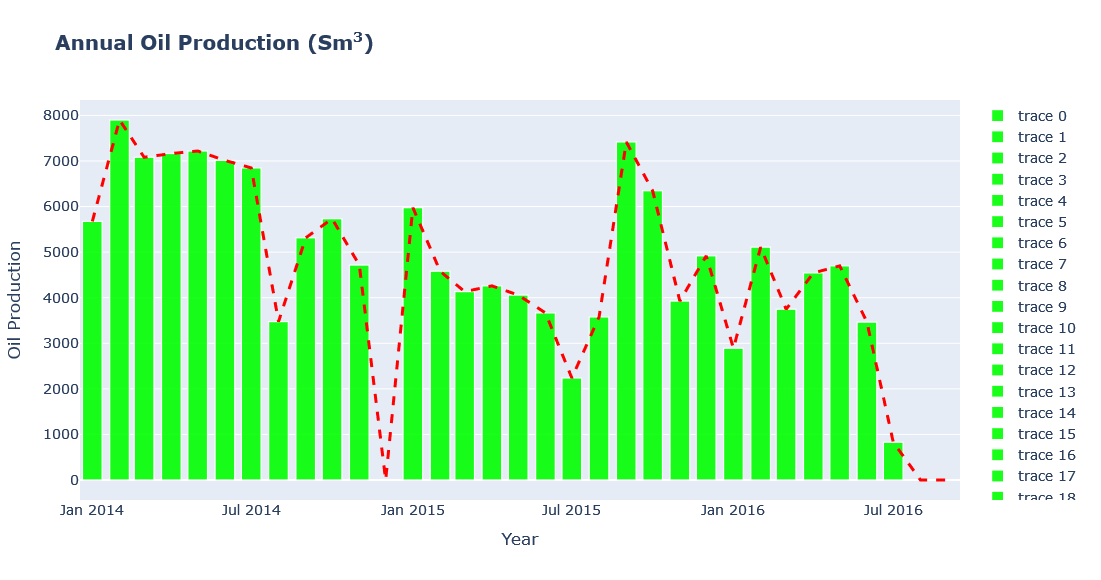

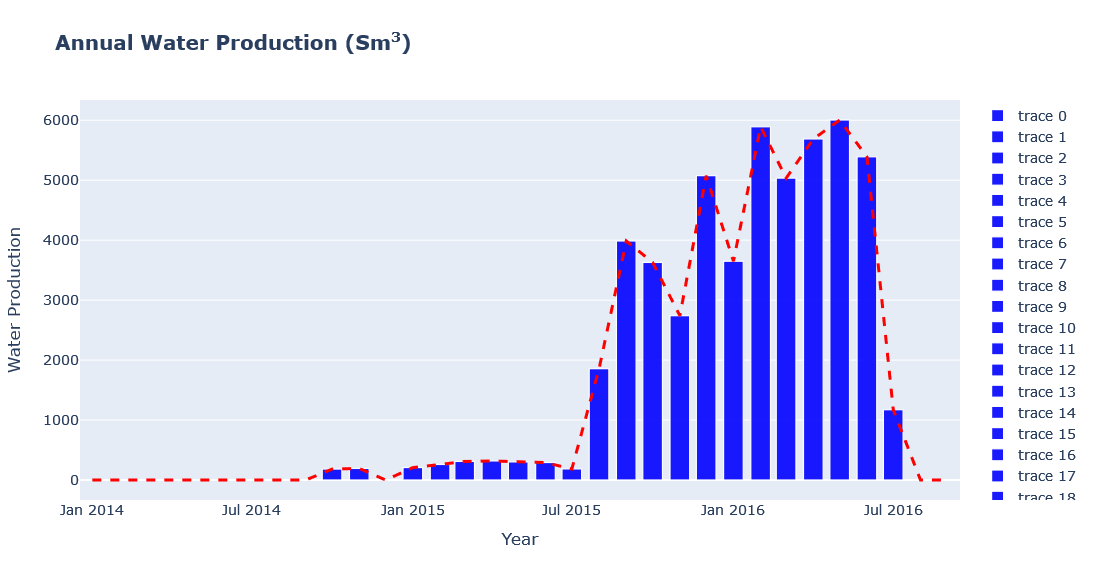

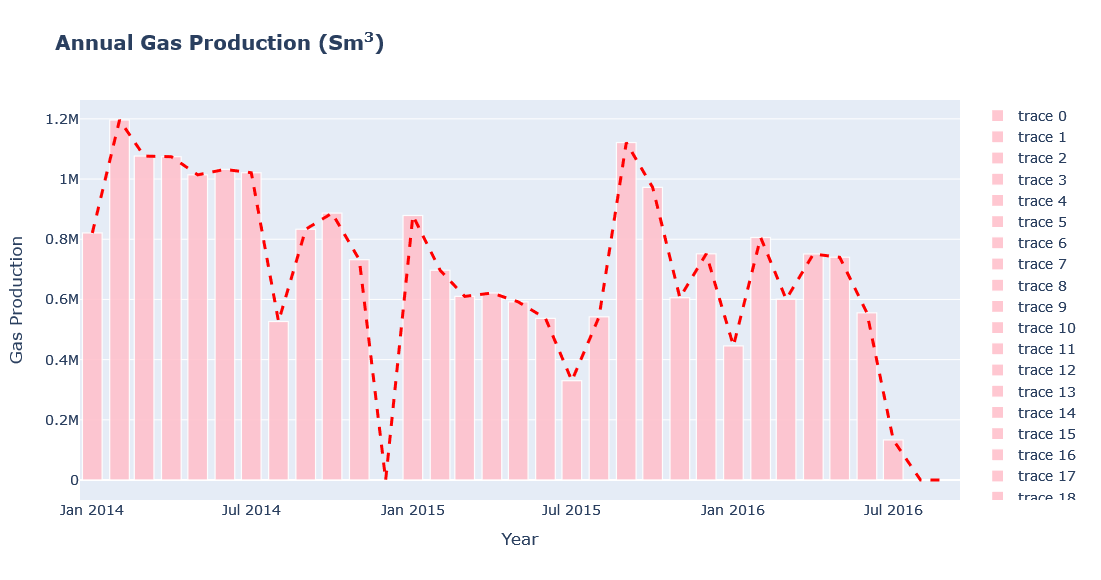

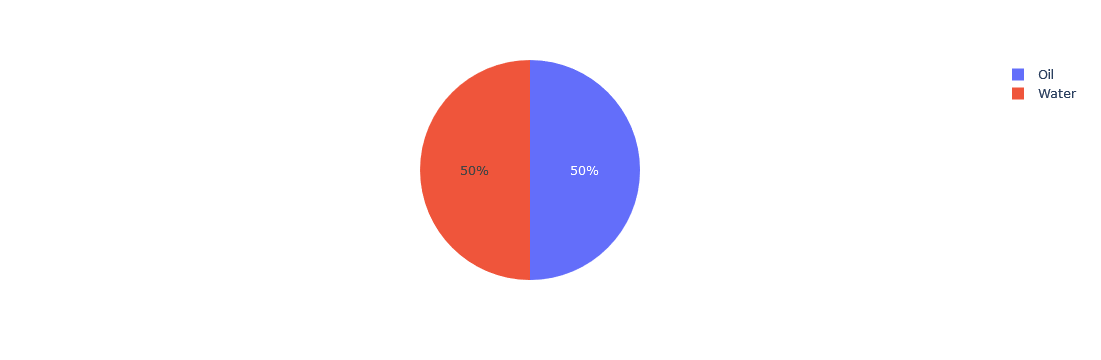

In [61]:
fig = plot_monthly(Well5,Well5.date, Well5.Oil, Well5["On Stream"], 'lime', "Oil Production")
fig.show()

fig = plot_monthly(Well5,Well5.date, Well5.Water, Well5["On Stream"], 'blue', "Water Production")
fig.show()

fig = plot_monthly(Well5,Well5.date, Well5.Gas, Well5["On Stream"], 'pink', "Gas Production")
fig.show()

fig = px.pie(Well5[["Oil", "Water"]], names=["Oil", "Water"]) 
fig.show()

In [62]:
print("statistical analysis:")
display(Well6.describe())
print("--------------------------------------------------------")
print("over see of the form of the data:")
display(Well6.info())

statistical analysis:


date   On Stream  Oil  Gas  Water  \
count                            112  105.000000  0.0  0.0    0.0   
mean   2012-04-16 05:34:17.142857216  612.068202  NaN  NaN    NaN   
min              2007-09-01 00:00:00    0.000000  NaN  NaN    NaN   
25%              2009-12-24 06:00:00  596.166670  NaN  NaN    NaN   
50%              2012-04-16 00:00:00  685.999990  NaN  NaN    NaN   
75%              2014-08-08 18:00:00  716.250010  NaN  NaN    NaN   
max              2016-12-01 00:00:00  744.000000  NaN  NaN    NaN   
std                              NaN  176.639247  NaN  NaN    NaN   

                  WI  
count     103.000000  
mean   157676.961569  
min         0.000000  
25%    131592.820522  
50%    155627.704288  
75%    193325.894466  
max    269279.176161  
std     53607.650214

--------------------------------------------------------
over see of the form of the data:
<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 305 to 416
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       112 non-null    datetime64[ns]
 1   WELL       112 non-null    object        
 2   On Stream  105 non-null    float64       
 3   Oil        0 non-null      float64       
 4   Gas        0 non-null      float64       
 5   Water      0 non-null      float64       
 6   WI         103 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 7.0+ KB


None

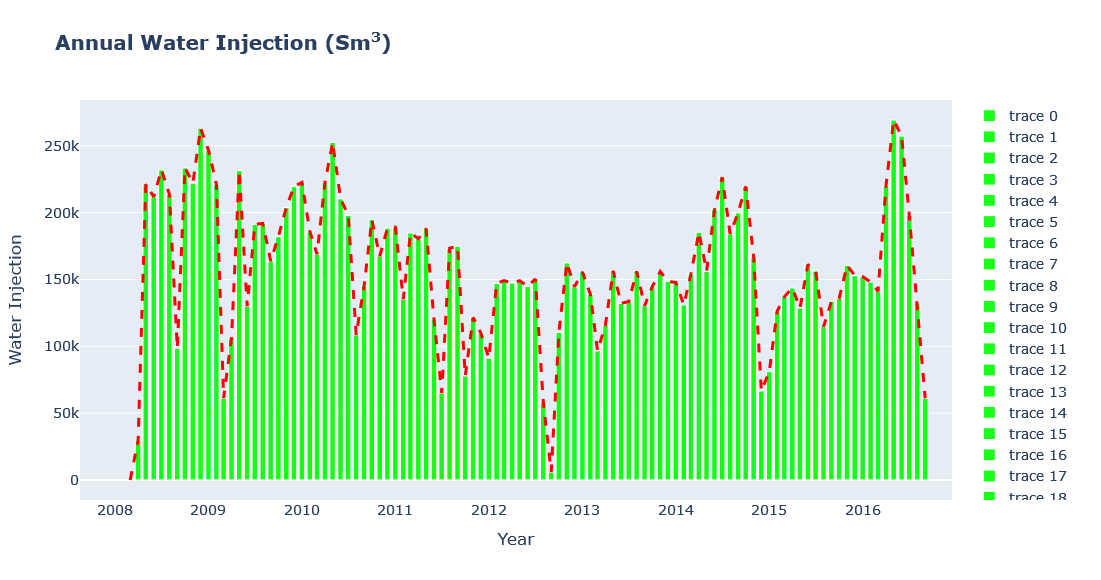

In [63]:
fig = plot_monthly(Well6,Well6.date, Well6.WI, Well5["On Stream"], 'lime', "Water Injection")
fig.show()


In [67]:
Well7.head()

Empty DataFrame
Columns: [date, WELL, On Stream, Oil, Gas, Water, WI]
Index: []

In [64]:
print("statistical analysis:")
display(Well7.describe())
print("--------------------------------------------------------")
print("over see of the form of the data:")
display(Well7.info())

statistical analysis:


date  On Stream  Oil  Gas  Water   WI
count    0        0.0  0.0  0.0    0.0  0.0
mean   NaT        NaN  NaN  NaN    NaN  NaN
min    NaT        NaN  NaN  NaN    NaN  NaN
25%    NaT        NaN  NaN  NaN    NaN  NaN
50%    NaT        NaN  NaN  NaN    NaN  NaN
75%    NaT        NaN  NaN  NaN    NaN  NaN
max    NaT        NaN  NaN  NaN    NaN  NaN
std    NaN        NaN  NaN  NaN    NaN  NaN

--------------------------------------------------------
over see of the form of the data:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       0 non-null      datetime64[ns]
 1   WELL       0 non-null      object        
 2   On Stream  0 non-null      float64       
 3   Oil        0 non-null      float64       
 4   Gas        0 non-null      float64       
 5   Water      0 non-null      float64       
 6   WI         0 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 0.0+ bytes


None

In [3]:
data['NPD_WELL_BORE_CODE'].replace(7405, "well1", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(7078, "well2", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(5599, "well3", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(5351, "well4", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(7289, "well5", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(5693, "well6", inplace=True)
data['NPD_WELL_BORE_CODE'].replace(5769, "well7", inplace=True)

data['NPD_WELL_BORE_CODE'].unique()

C:\Users\mehrd\AppData\Local\Temp\ipykernel_14200\2560385617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NPD_WELL_BORE_CODE'].replace(7405, "well1", inplace=True)


array(['well1', 'well2', 'well3', 'well4', 'well5', 'well6', 'well7'],
      dtype=object)

Well1

In [4]:
Well1 = data[data["NPD_WELL_BORE_CODE"] == "well1"]
Well1.head()

DATEPRD WELL_BORE_CODE NPD_WELL_BORE_CODE NPD_WELL_BORE_NAME  \
0 2014-04-07  NO 15/9-F-1 C              well1         15/9-F-1 C   
1 2014-04-08  NO 15/9-F-1 C              well1         15/9-F-1 C   
2 2014-04-09  NO 15/9-F-1 C              well1         15/9-F-1 C   
3 2014-04-10  NO 15/9-F-1 C              well1         15/9-F-1 C   
4 2014-04-11  NO 15/9-F-1 C              well1         15/9-F-1 C   

   NPD_FIELD_CODE NPD_FIELD_NAME  NPD_FACILITY_CODE NPD_FACILITY_NAME  \
0         3420717          VOLVE             369304    MÆRSK INSPIRER   
1         3420717          VOLVE             369304    MÆRSK INSPIRER   
2         3420717          VOLVE             369304    MÆRSK INSPIRER   
3         3420717          VOLVE             369304    MÆRSK INSPIRER   
4         3420717          VOLVE             369304    MÆRSK INSPIRER   

   ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  ...  AVG_CHOKE_UOM  AVG_WHP_P  \
0            0.0                0.00000  ...              %    0.00000   
1            0.0                    NaN  ...              %    0.00000   
2            0.0                    NaN  ...              %    0.00000   
3            0.0                    NaN  ...              %    0.00000   
4            0.0              310.37614  ...              %   33.09788   

   AVG_WHT_P  DP_CHOKE_SIZE BORE_OIL_VOL  BORE_GAS_VOL  BORE_WAT_VOL  \
0    0.00000        0.00000          0.0           0.0           0.0   
1    0.00000        0.00000          0.0           0.0           0.0   
2    0.00000        0.00000          0.0           0.0           0.0   
3    0.00000        0.00000          0.0           0.0           0.0   
4   10.47992       33.07195          0.0           0.0           0.0   

   BORE_WI_VOL   FLOW_KIND  WELL_TYPE  
0          NaN  production         WI  
1          NaN  production         OP  
2          NaN  production         OP  
3          NaN  production         OP  
4          NaN  production         OP  

[5 rows x 24 columns]